# KNN Algorithm usecase using Iris Dataset

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Dataset

In [2]:
df=sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Transform Species column to Numericals

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder=LabelEncoder()

In [7]:
df["sp"]=pd.DataFrame(encoder.fit_transform(df["species"]))

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sp
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# Use Regressor Algorithm to find out sepal_lenght's

## Split Independent and Dependent features into train and test

In [9]:
x=df.drop(["sepal_length","species"],axis=1)
y=df["sepal_length"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Import required libraries to use the model and to do evaluation metrics

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [13]:
model=KNeighborsRegressor(n_neighbors=3)

In [14]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [15]:
y_pred=model.predict(x_test)

## Check the performance of the Model

In [16]:
r2_score(y_test,y_pred)

0.6117073556603678

In [17]:
mean_absolute_error(y_test,y_pred)

0.31491228070175453

In [18]:
mean_absolute_percentage_error(y_test,y_pred)

0.05557470769618534

# Use Classification Algorithm to find out Species's

## Split Independent and Dependent features into train and test

In [19]:
x=df.drop(["sp","species"],axis=1)
y=df["species"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Import required libraries to use the model and to do evaluation metrics

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
model=KNeighborsClassifier(n_neighbors=3)

In [24]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred=model.predict(x_test)

## Check the performance of the Model

Text(50.722222222222214, 0.5, 'Predicted')

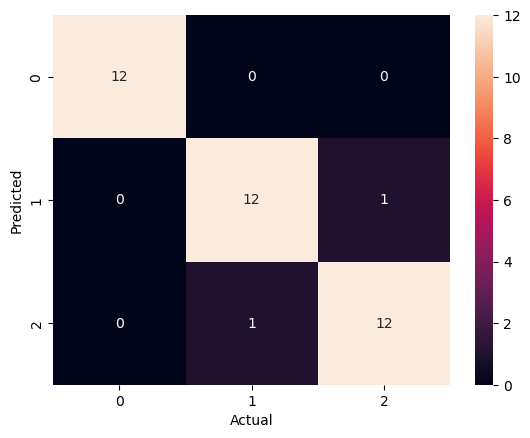

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

